<a href="https://colab.research.google.com/github/fsluizvictor/K-means/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
from scipy.io import loadmat

In [22]:
def file_path_name(file_name):
  return os.sep.join(['data'] + [file_name])

In [23]:
file_name = 'data2.mat'
file_path = file_path_name(file_name)
first_data = loadmat(file_path)

In [24]:
import pandas as pd

X = pd.DataFrame(first_data['X'], columns = ['X','y'])

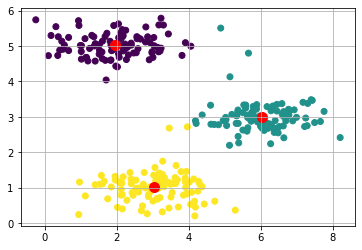

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 3, #numero de clusters
init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 1000) #numero máximo de iterações
pred_y = kmeans.fit_predict(X)

plt.scatter(X['X'], X['y'], c = pred_y) #posicionamento dos eixos x e y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = 'red') #posição de cada centroide no gráfico
plt.show()

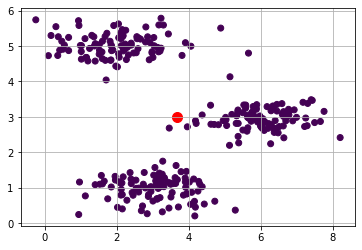

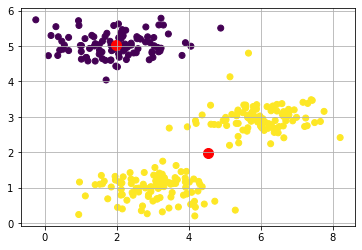

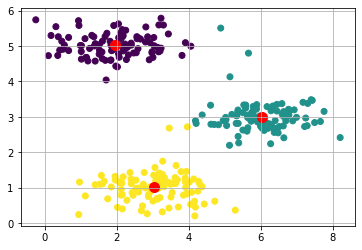

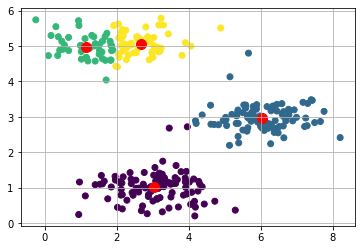

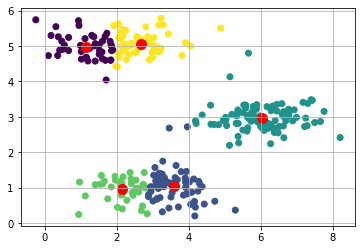

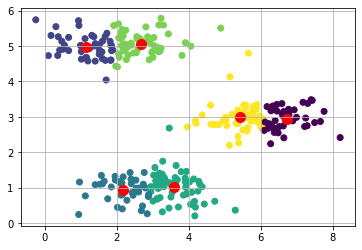

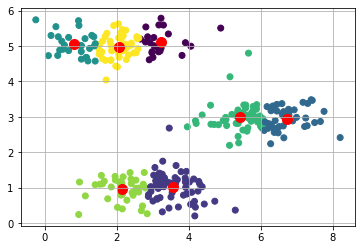

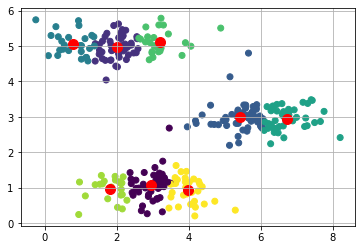

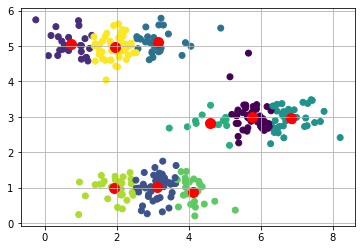

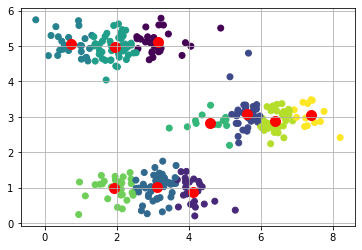

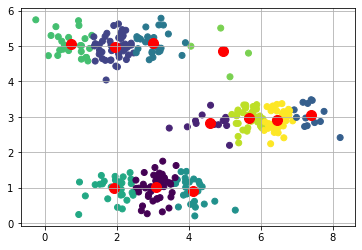

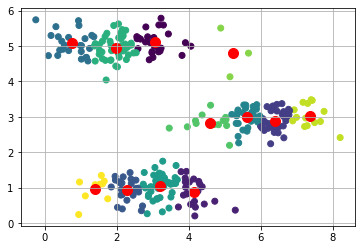

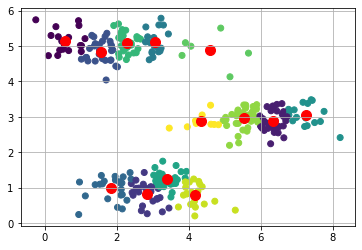

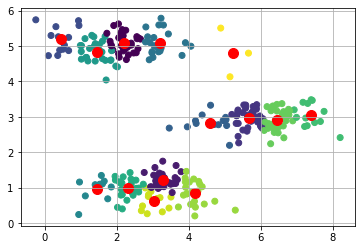

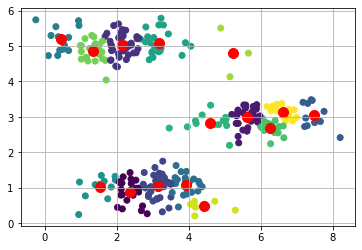

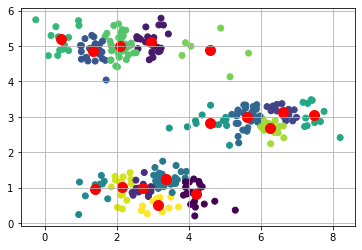

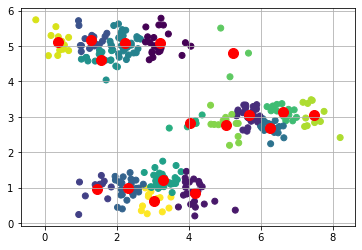

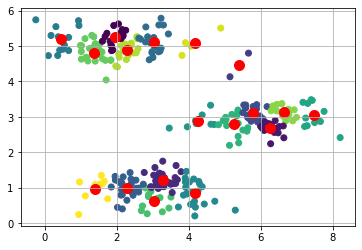

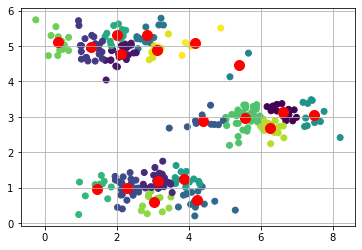

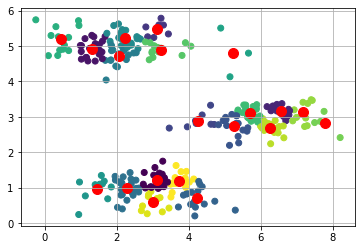

In [26]:
number_clusters = [i + 1 for i in range(20)]
inertias = []

for n_cluster in number_clusters:
  kmeans = KMeans(n_clusters = n_cluster, #numero de clusters
  init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
  max_iter = 1000) #numero máximo de iterações
  pred_y = kmeans.fit_predict(X)
  inertias.append(kmeans.inertia_)

  plt.scatter(X['X'], X['y'], c = pred_y) #posicionamento dos eixos x e y
  plt.grid() #função que desenha a grade no nosso gráfico
  plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = 'red') #posição de cada centroide no gráfico
  plt.show()

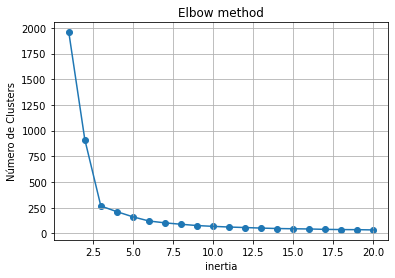

In [27]:
plt.scatter(number_clusters, inertias) #posicionamento dos eixos x e y
plt.plot(number_clusters, inertias)
plt.xlabel('inertia')
plt.ylabel('Número de Clusters')
plt.title('Elbow method')
plt.grid() #função que desenha a grade no nosso gráfico
plt.show()

In [ ]:
def hierarchical_agglomerative_clustering_plot(title,y_predict):
  plt.scatter(X['X'], X['y'], c=y_predict, s=50, cmap = 'viridis')
  plt.title(title)
  plt.grid() 
  plt.show()

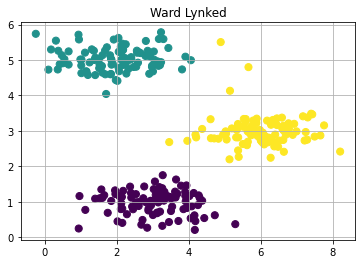

In [31]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 3, linkage='ward')
y_predict = agg.fit_predict(X)

hierarchical_agglomerative_clustering_plot('Ward Lynked',y_predict)

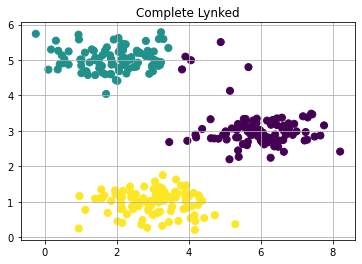

In [32]:
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
y_predict = agg.fit_predict(X)

hierarchical_agglomerative_clustering_plot('Complete Lynked',y_predict)

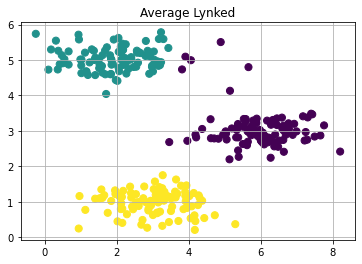

In [33]:
agg = AgglomerativeClustering(n_clusters=3, linkage='average')
y_predict = agg.fit_predict(X)

hierarchical_agglomerative_clustering_plot('Average Lynked',y_predict)

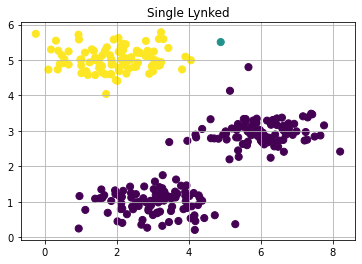

In [34]:
agg = AgglomerativeClustering(n_clusters=3, linkage='single')
y_predict = agg.fit_predict(X)

hierarchical_agglomerative_clustering_plot('Single Lynked',y_predict)

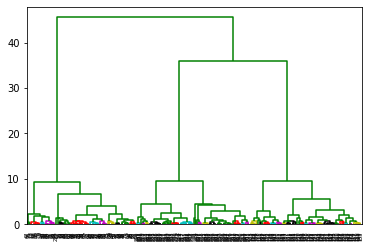

In [36]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

temp = hierarchy.linkage(X, 'ward')
plt.figure()
 
dn = hierarchy.dendrogram(
    temp, above_threshold_color="green", color_threshold=.7)